# Superstore Sales and Profit Forecasting

## Problem Statement
The main objective of this project is to forecast sales and profit for future based on data provided in dataset. With growing demands in the market, a Superstore owner is seeking your knowledge in understanding what works best for them. They would like to understand what would be sales and profit in upcoming years for analysis and pre-planing using Time Series Forecasting.

We have provide data from 2014 to 2017 we have to predict sales and profit for year 2018.

## Data Definition
Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

## Table of Content

1. **Import packages**
2. **Set Options**
3. **Read data**
4. **Data preparation**
    - 4.1 - Dimensions of Dataset
    - 4.2 - Statistical Summary
    - 4.3 - Checking Data Types
    - 4.4 - Converting Date
    - 4.5 - Checking Missing Values
    - 4.6 - Indexing with Date
    - 4.7 - Checking Oldest and Latest Order Date
5. **Time Series Analysis**
    - 5.1 - Visualizing data
    - 5.2 - Sampling
    - 5.3 - Checking Stationarity
        - 5.3.1 - ADF Test
    - 5.4 - Decomposing
6. **Time Series Forcasting using ARIMA**
    - 6.1 - Parameter Selection
    - 6.2 - Fitting the ARIMA model
    - 6.3 - Validating Forecasts
    - 6.4 - Calculating MSE and RMSE
    - 6.5 - Visualizing the Forecast
7. **Conclusion**

# 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import itertools

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

# 2. Set Options
Now we make necessary changes to :
1. Display complete data frames
2. To avoid the exponential number
3. To Plot all graphs with same size

In [2]:
# display all rows of the dataframe
pd.options.display.max_rows=None

# display all columns of the dataframe
pd.options.display.max_columns=None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

#To fix a particular size for all plots
plt.rcParams['figure.figsize']=(15,6)

# 3. Read Data

In [3]:
raw_data=pd.read_csv(r'D:\Data Science\Capstone 2 datasets\Superstore\superstore_train.csv')
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 4.Data Preparation

**The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.**

Here we will analyze and prepare data to perform Time Series Forecasting:
1. Check dimensions and data types of the dataframe 
2. Study summary statistics
3. Converting date into standard format
4. Check for missing values

## 4.1 Shape of Dataset

In [4]:
# Using shape attribute we will check the dimensions of dataset
raw_data.shape

(8000, 21)

## 4.2 Dataset Summary

In [5]:
# To view the numerical variables summary view we just pass describe() function without any parameter
raw_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,55225.850000,229.823459,3.786875,0.152864,28.134233
std,2309.54541,32049.060112,621.031927,2.211349,0.203951,227.328814
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2000.75000,22980.000000,17.340000,2.000000,0.000000,1.814700
50%,4000.50000,55901.000000,54.352000,3.000000,0.150000,8.765100
75%,6000.25000,90008.000000,211.870000,5.000000,0.200000,29.950500
max,8000.00000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# To view the categorical variables summary we need to pass include='object' parameter in the describe function
raw_data.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
unique,3962,1181,1279,4,784,784,3,1,502,49,4,1831,3,17,1819
top,CA-2017-100111,2016-09-05,2017-09-26,Standard Class,JL-15835,John Lee,Consumer,United States,New York City,California,West,TEC-AC-10002049,Office Supplies,Binders,Staples
freq,14,37,32,4788,33,33,4192,8000,743,1608,2605,15,4840,1214,43


## 4.3 Checking Data Types

In [7]:
# info() function is used to check the data types and other information of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

**Here, we can observe that the order date and ship date are identified as a object. We need it in the date format, so in the next step we will convert date data type. We will just convert order date data type because, we are using order date for further analysis.**

## 4.4 Converting Date Data Type

In [8]:
data=raw_data.copy(deep=True)

In [9]:
# we have use apply() function with in it a lambda function of converting order date to date time data type.
data['Order Date']=data['Order Date'].apply(lambda x: pd.to_datetime(x))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   object        
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

**We have converted the data type of date from object to date time.**

## 4.5 Checking null values

In [11]:
# isnull() function helps to check null values
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**We conclude we zero null values.**

## 4.6 Indexing With Date

**First we drop columns we are not required for further analysis.**

In [12]:
cols=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount']

In [13]:
data_1=data.copy(deep=True)

In [14]:
data_1.drop(cols,axis=1,inplace=True)

In [15]:
data_1.head()

,Order Date,Sales,Profit
0,2016-11-08,261.9600,41.9136
1,2016-11-08,731.9400,219.5820
2,2016-06-12,14.6200,6.8714
3,2015-10-11,957.5775,-383.0310
4,2015-10-11,22.3680,2.5164


**We have just kept order date, sales and profit columns for further analysis.**

In [16]:
# Now with the help of group by function we will sum all profit and sales on each date.
data_1=data_1.groupby('Order Date')[['Sales','Profit']].sum().reset_index()
data_1.head(10)

,Order Date,Sales,Profit
0,2014-01-03,16.448,5.5512
1,2014-01-04,288.060,-65.9901
2,2014-01-05,19.536,4.8840
3,2014-01-06,4407.100,1358.0524
4,2014-01-07,87.158,-71.9621
5,2014-01-09,40.544,10.9180
6,2014-01-10,54.830,22.6537
7,2014-01-11,9.940,3.0814
8,2014-01-13,3512.949,663.0670
9,2014-01-14,61.960,-53.2856


In [17]:
# We will set the date column as a index
data_1.set_index('Order Date', inplace=True)
data_1.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1181, freq=None)

In [18]:
data_1.head()

,Sales,Profit
Order Date,,
2014-01-03,16.448,5.5512
2014-01-04,288.060,-65.9901
2014-01-05,19.536,4.8840
2014-01-06,4407.100,1358.0524
2014-01-07,87.158,-71.9621


## 4.7 Checking Oldest and Latest Order Date

In [19]:
data['Order Date'].min(), data['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# 5. Time Series Analysis

**Time Series:** Statistical method used to analyze data collected overtime, to study the trend, pattern or behaviour within a dataset.

The data recorded is evenly spaced or recorded at regular interval of time in time series analysis.

## 5.1 Visualizing Data

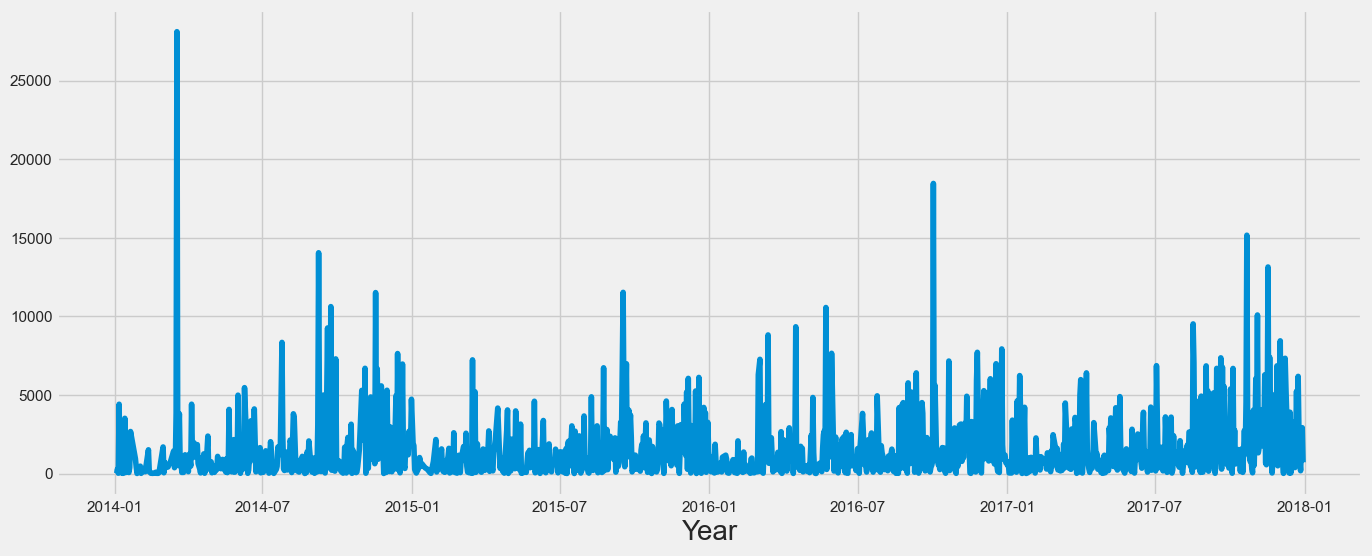

In [20]:
# We will visualize the Sales data year wise with the help of line plot
plt.plot(data_1['Sales'])
plt.xlabel('Year',fontsize=20)
plt.show()

**We can observe that most of time the sales is stable but, in end and between of every year we can see there is growth in sales suddenly and then they comes back to regular sale.**

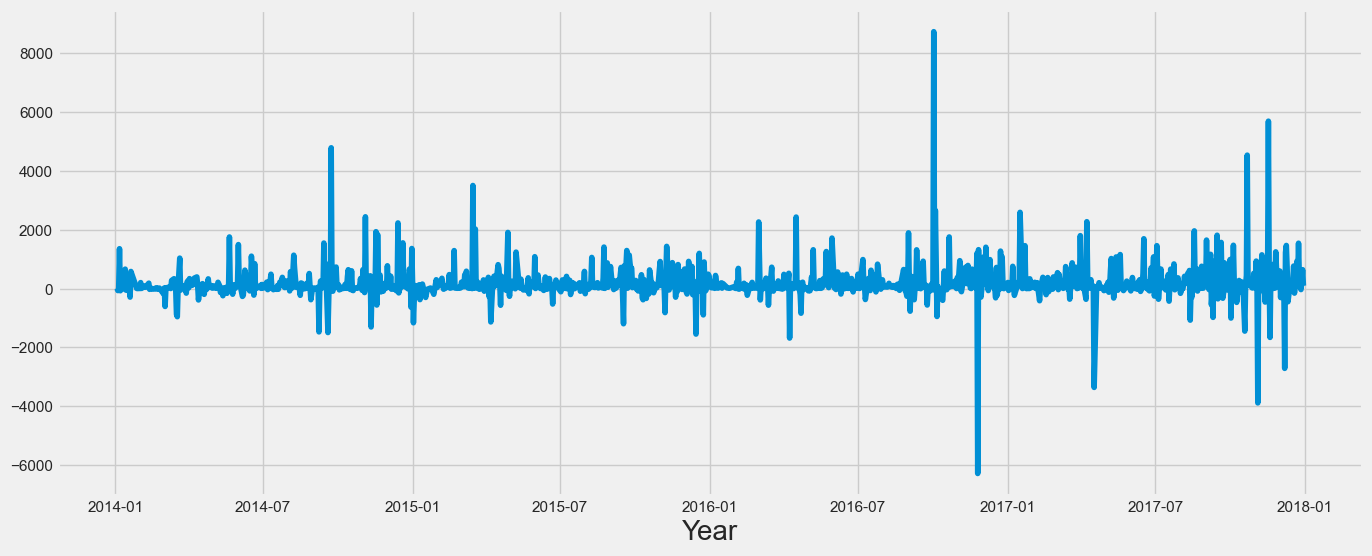

In [21]:
# We will visualize the Profit data year wise with the help of line plot
plt.plot(data_1['Profit'])
plt.xlabel('Year',fontsize=20)
plt.show()

**We can observe positive and negative values. Negative values indicates the loss and positive values profit. We can see there was high profit and high loss in year 2016.**

## 5.2 Sampling The Data

In [22]:
# With the help of resample function we will smaple our data by taking mean of Sales and Profit.
data_2=data_1[['Sales','Profit']].resample('MS').mean()

In [23]:
data_2.head()

,Sales,Profit
Order Date,,
2014-01-01,698.607050,118.575475
2014-02-01,177.635765,36.329794
2014-03-01,2145.722739,-4.513613
2014-04-01,968.728043,105.515574
2014-05-01,645.729963,87.964659


**MS in the resample function indicates Month Start Value.**

In [24]:
# We check the shape of data
data_2.shape

(48, 2)

# 5.3 Checking Stationarity

**What Is a Stationary Time Series?**

A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components.

**Why Should Time Series Be Stationary?**

Stationary series is easier for statistical models to predict effectively and precisely.

**There are various test to check stationarity, we will use Augmented Dickey-Fuller(ADF) statistics.**

**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO)**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

## 5.3.1 ADF Test

In [25]:
# lets check stationarity for Sales data

result=adfuller(data_2['Sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -4.823658
p-value: 0.000049
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


We can see that our statistic value of -4.823658 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000049, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

In [26]:
# lets check stationarity for Profit data

result=adfuller(data_2['Profit'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -7.009545
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


We can see that our statistic value of -7.009545 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000000, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

# 5.4 Decomposing

**Decomposing the time series into three distinct components: trend, seasonality, and noise.**

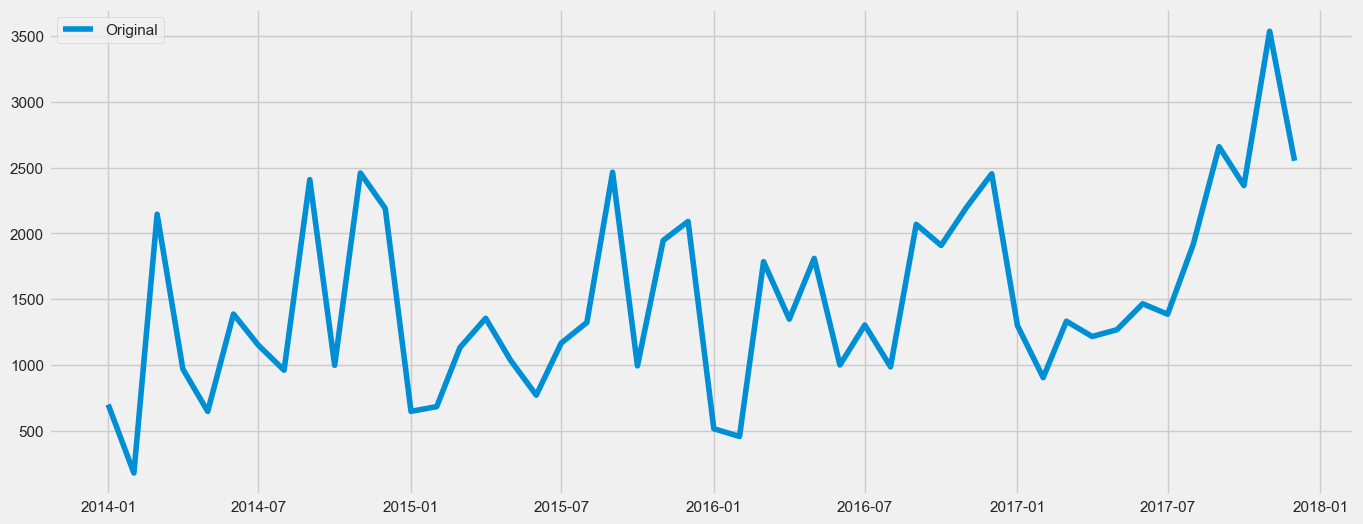

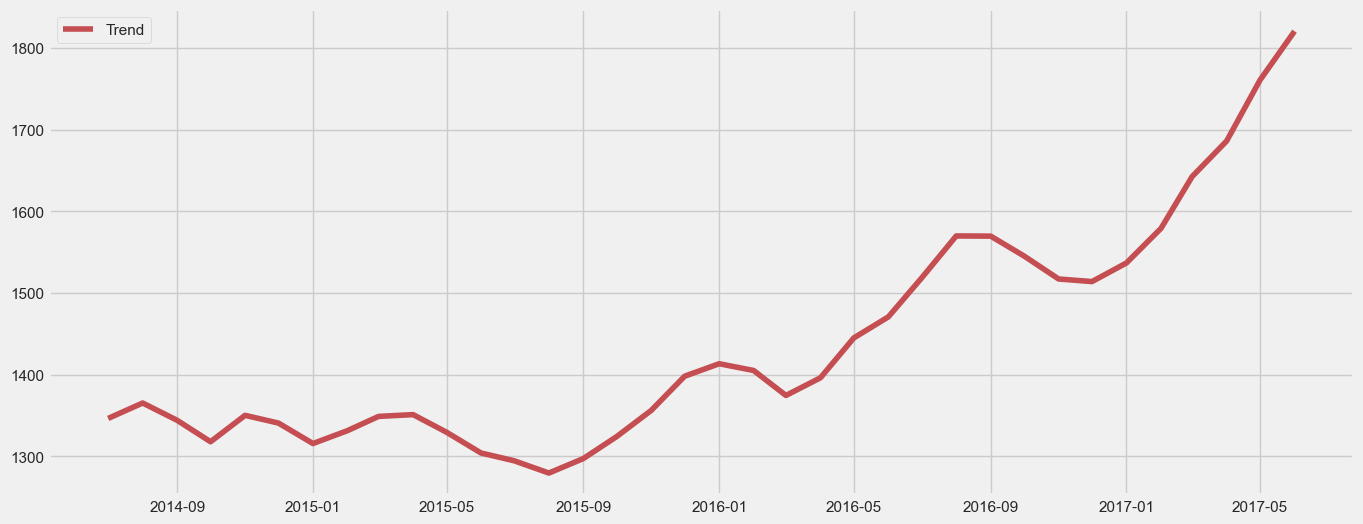

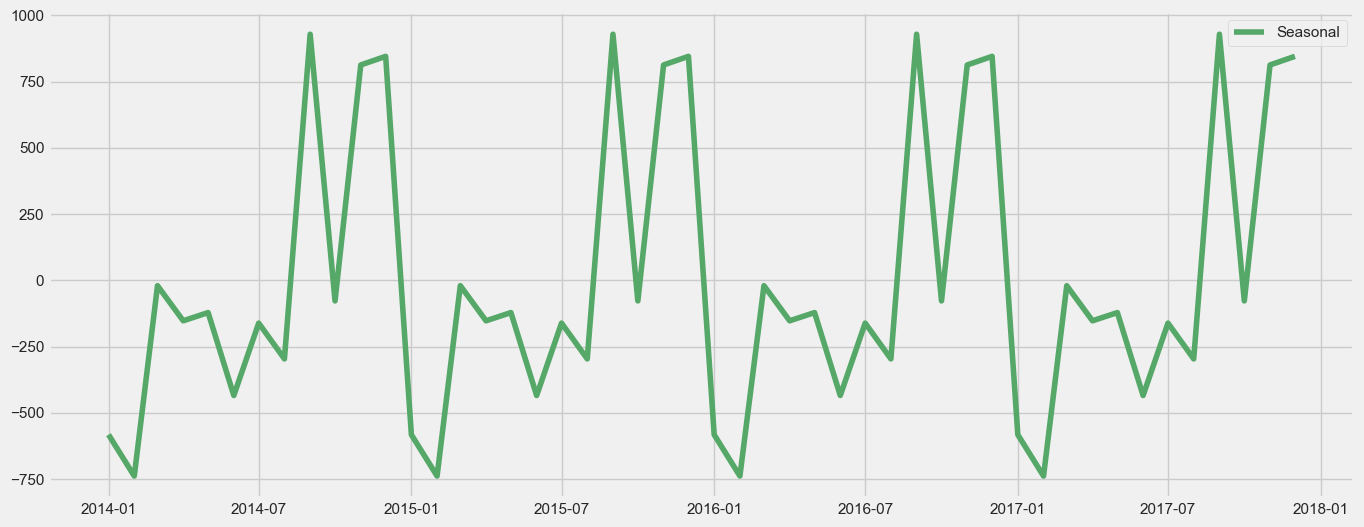

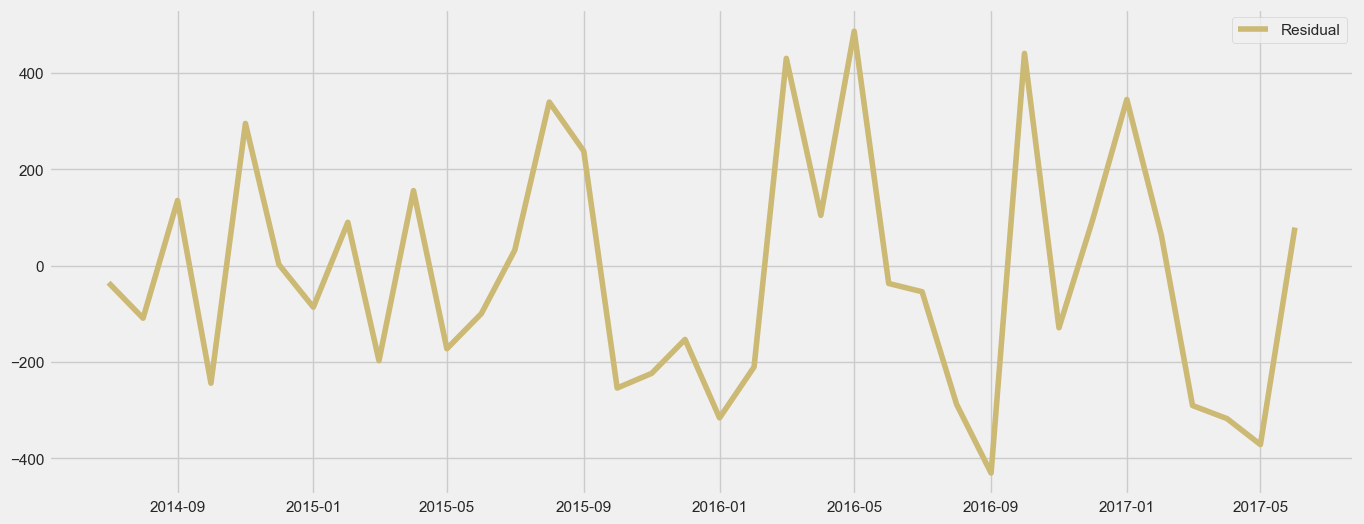

In [27]:
# Lets view for Sales Data
decomposition=seasonal_decompose(data_2['Sales'])

plt.plot(data_2['Sales'],label='Original')
plt.legend(loc='best')
plt.show()

trend=decomposition.trend
plt.plot(trend,'r',label='Trend')
plt.legend(loc='best')
plt.show()

seasonal=decomposition.seasonal
plt.plot(seasonal,'g',label='Seasonal')
plt.legend(loc='best')
plt.show()

residual=decomposition.resid
plt.plot(residual,'y',label='Residual')
plt.legend(loc='best')
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within every year. 

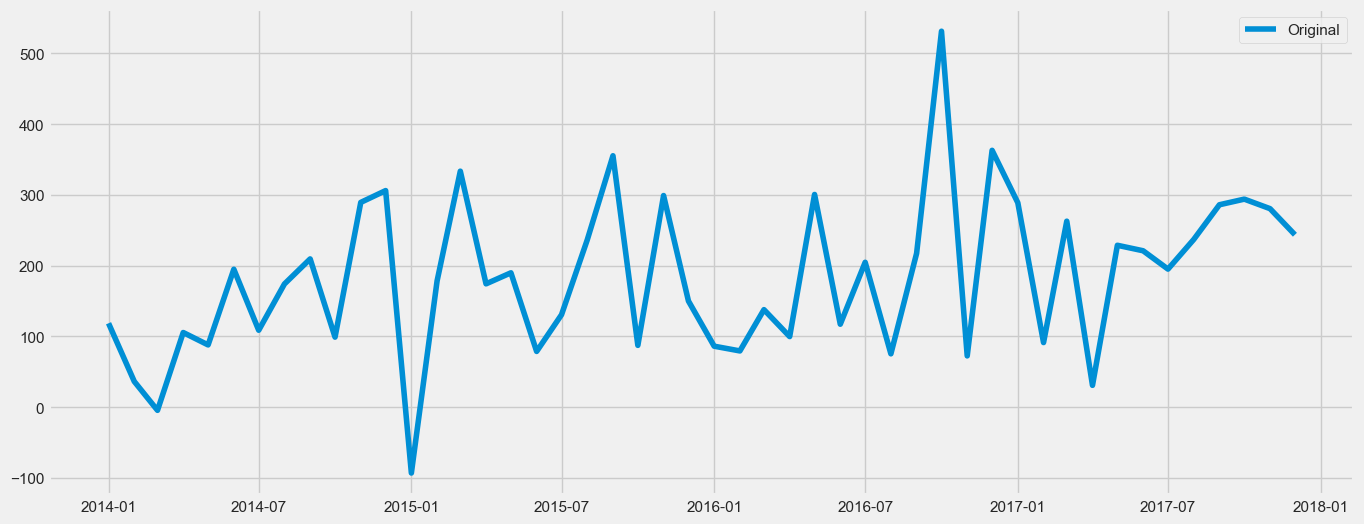

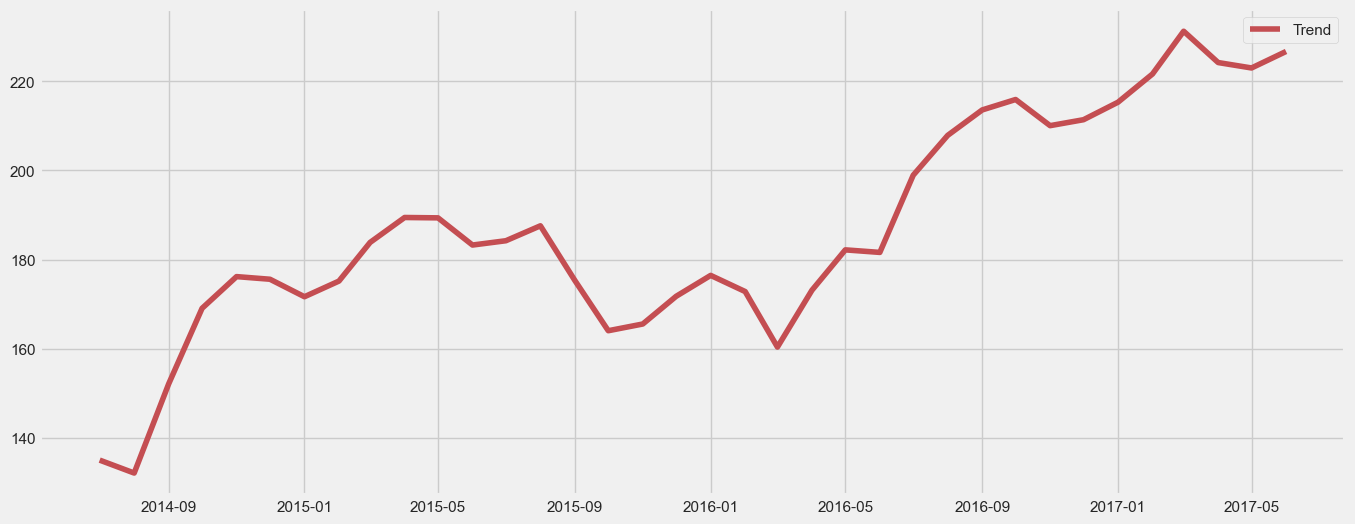

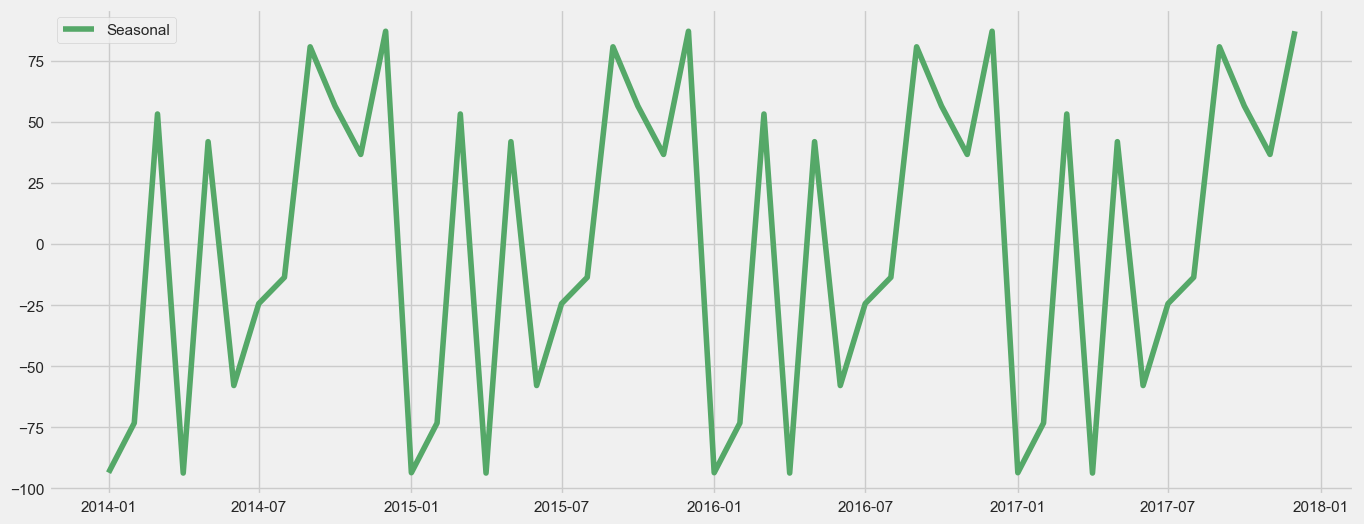

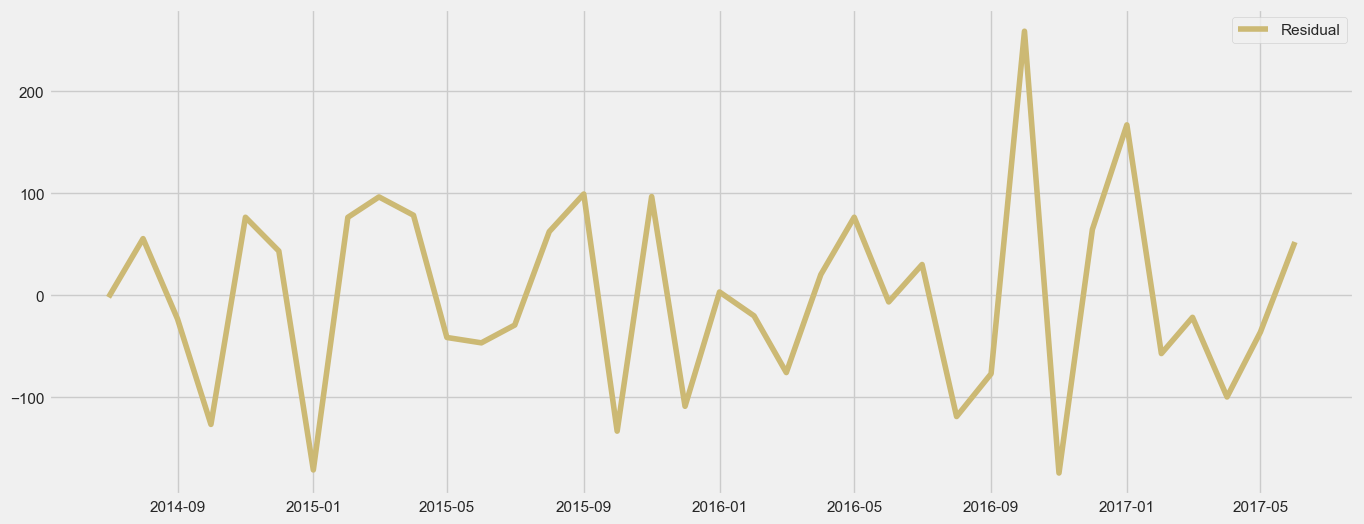

In [28]:
# Lets view for Profit data
decomposition=seasonal_decompose(data_2['Profit'])

plt.plot(data_2['Profit'],label='Original')
plt.legend(loc='best')
plt.show()

trend=decomposition.trend
plt.plot(trend,'r',label='Trend')
plt.legend(loc='best')
plt.show()

seasonal=decomposition.seasonal
plt.plot(seasonal,'g',label='Seasonal')
plt.legend(loc='best')
plt.show()

residual=decomposition.resid
plt.plot(residual,'y',label='Residual')
plt.legend(loc='best')
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The Profit are always low at the beginning of the year and high at the end of the year. There is always an upward trend within every year.

# 6.Time Series Forcasting using ARIMA

**ARIMA Model: Auto-Regressive Integrated Moving Average**

ARIMA models are defined for stationary time series.

It explains a given time series based on its own past values.
Characterized by 3 terms p,d,q.

   p: Auto-Regressive
   d: Integrated
   q: Moving Average
   
If series is not stationary then 'd' term helps to make series          stationary.

We will use ARIMA for forecasting our time series. Where p,d,q accounts for seasonality, trend and noise in the time series data.

In [29]:
p=d=q= range(0,2)
pdq= list(itertools.product(p, d, q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# 6.1 Parameter Selection

**We use “grid search” to find the optimal set of parameters that yields the best performance for our model.**

**Parameter Selection for Sales data**

In [30]:
order_list1 = []
param_seasonal_list1 = []
aic_list1 = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(data_2['Sales'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                          enforce_invertibilty=False)
            result_1=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,result_1.aic))
            order_list1.append(param)
            param_seasonal_list1.append(param_seasonal)
            aic_list1.append(result_1.aic)
        except:
            continue 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:832.4397625571409
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:593.441337548821
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:539.655769471922
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:359.07047498018983
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:555.1174340340672
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:534.6978926199704
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:373.38958146051937
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:360.8322436248757
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:785.7048596576703
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:559.4584835686728
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:525.9407544380697
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:344.26325544056925
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:557.1076265181907
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:521.0792162060231
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:372.88681302573383
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:345.9634380330725
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:750.7121426860691
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:538.2622862683742
ARIMA(0,

In [31]:
min_val1 = aic_list1.index(min(aic_list1))
order1 = order_list1[min_val1]
seasonal_order1 = param_seasonal_list1[min_val1]

**We are selecting those parameter which has minimum AIC score.**

**Parameter Selection for Profit data**

In [32]:
order_list2 = []
param_seasonal_list2 = []
aic_list2= []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(data_2['Profit'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                          enforce_invertibilty=False)
            result_2=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,result_2.aic))
            order_list2.append(param)
            param_seasonal_list2.append(param_seasonal)
            aic_list2.append(result_2.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:640.813023361241
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:473.57295927372667
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:455.95350595507335
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:295.50186357714153
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:469.31196840745514
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:450.62967644209834
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:308.3539080519797
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:297.50036520246346
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:613.1264684076558
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:456.72608989572296
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:443.32043414257913
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:283.79606784374835
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:470.8839642123875
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:436.13227856609535
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:307.67652479389585
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:286.11168201141305
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:601.9992010253856
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:447.0927168716935

In [33]:
min_val2 = aic_list2.index(min(aic_list2))
order2 = order_list2[min_val2]
seasonal_order2 = param_seasonal_list2[min_val2]

**We are selecting those parameter which has minimum AIC score.**

# 6.2 Fitting Arima Model

**Fitting model for Sales Data**

In [34]:
mod=sm.tsa.statespace.SARIMAX(data_2['Sales'],
                             order=order1,
                             seasonal_order=seasonal_order1,
                             enforce_invertibility=False)
result_sales=mod.fit()
print(result_sales.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8302      0.130     -6.375      0.000      -1.085      -0.575
ma.S.L12      -1.0000      0.247     -4.049      0.000      -1.484      -0.516
sigma2      1.324e+05   1.87e-06    7.1e+10      0.000    1.32e+05    1.32e+05


**Fitting model for Profit Data**

In [35]:
mod=sm.tsa.statespace.SARIMAX(data_2['Profit'],
                             order=order2,
                             seasonal_order=seasonal_order2,
                             enforce_invertibility=False)
result_profit=mod.fit()
print(result_profit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2981      0.225     -1.324      0.185      -0.739       0.143
ma.L1         -1.0000   3963.427     -0.000      1.000   -7769.174    7767.174
ma.S.L12      -1.0000   3963.321     -0.000      1.000   -7768.967    7766.967
sigma2      1.009e+04      0.301   3.36e+04      0.000    1.01e+04    1.01e+04


The summary attribute that results from the output of SARIMAX returns a significant amount of information. The coef column shows the weight  of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight.

**Running model diagnostics to check any unusual behaviour**

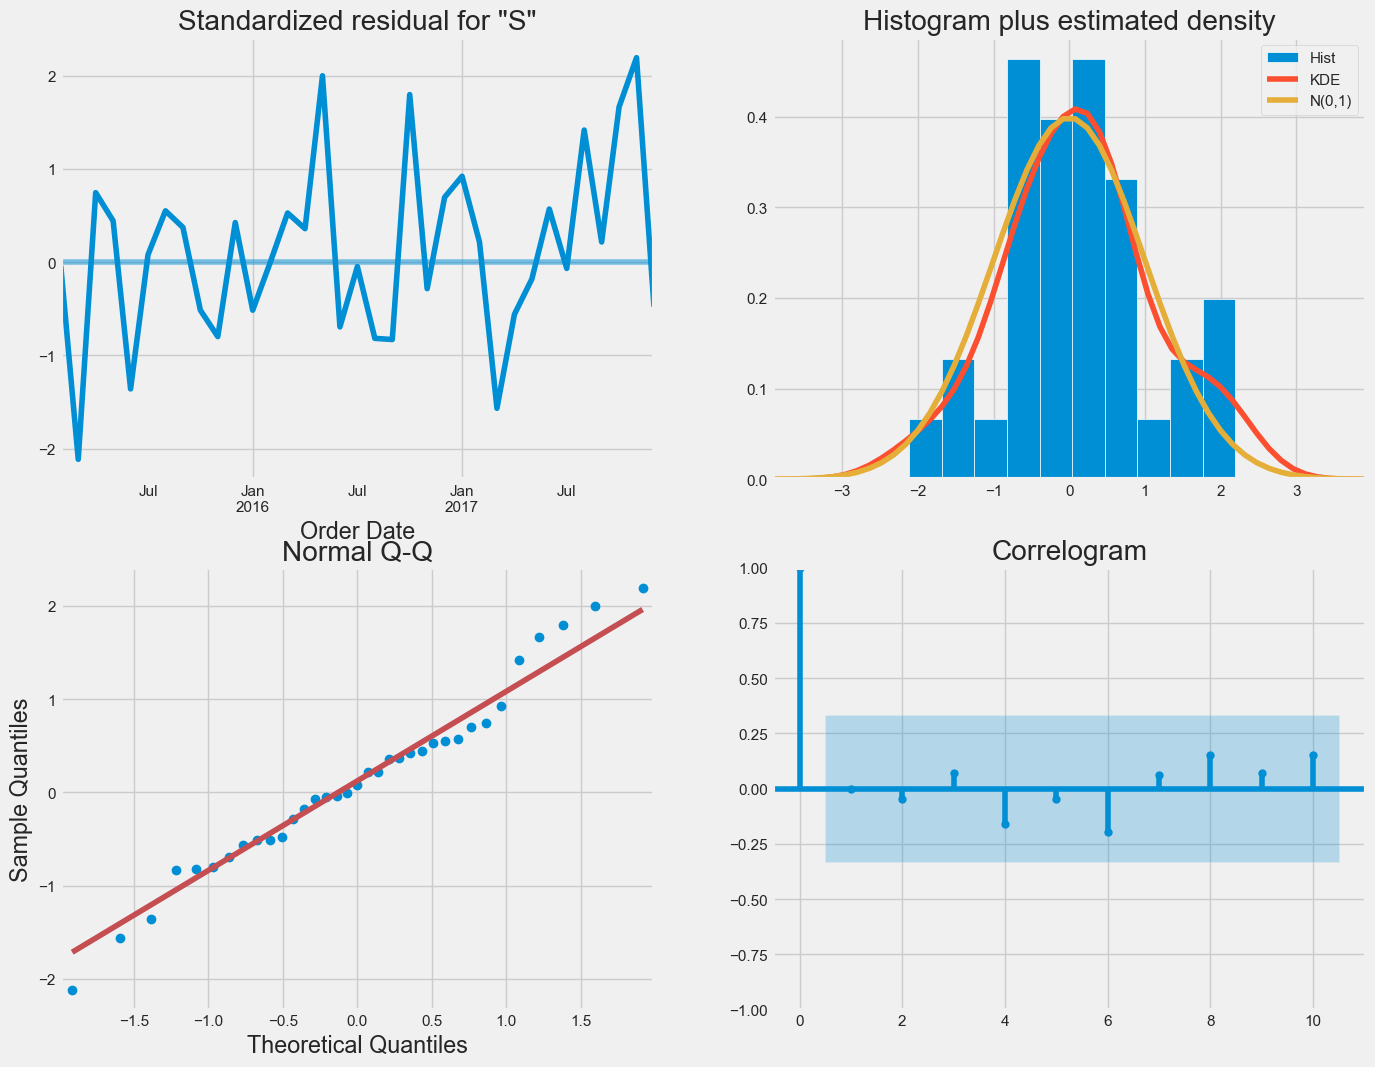

In [36]:
# We will use diagnostics plot to visaulize unusual behaviour

# Sales diagnostics
result_sales.plot_diagnostics(figsize=(15,12))
plt.show()

**We can conclude that model residuals are near normally distributed.**

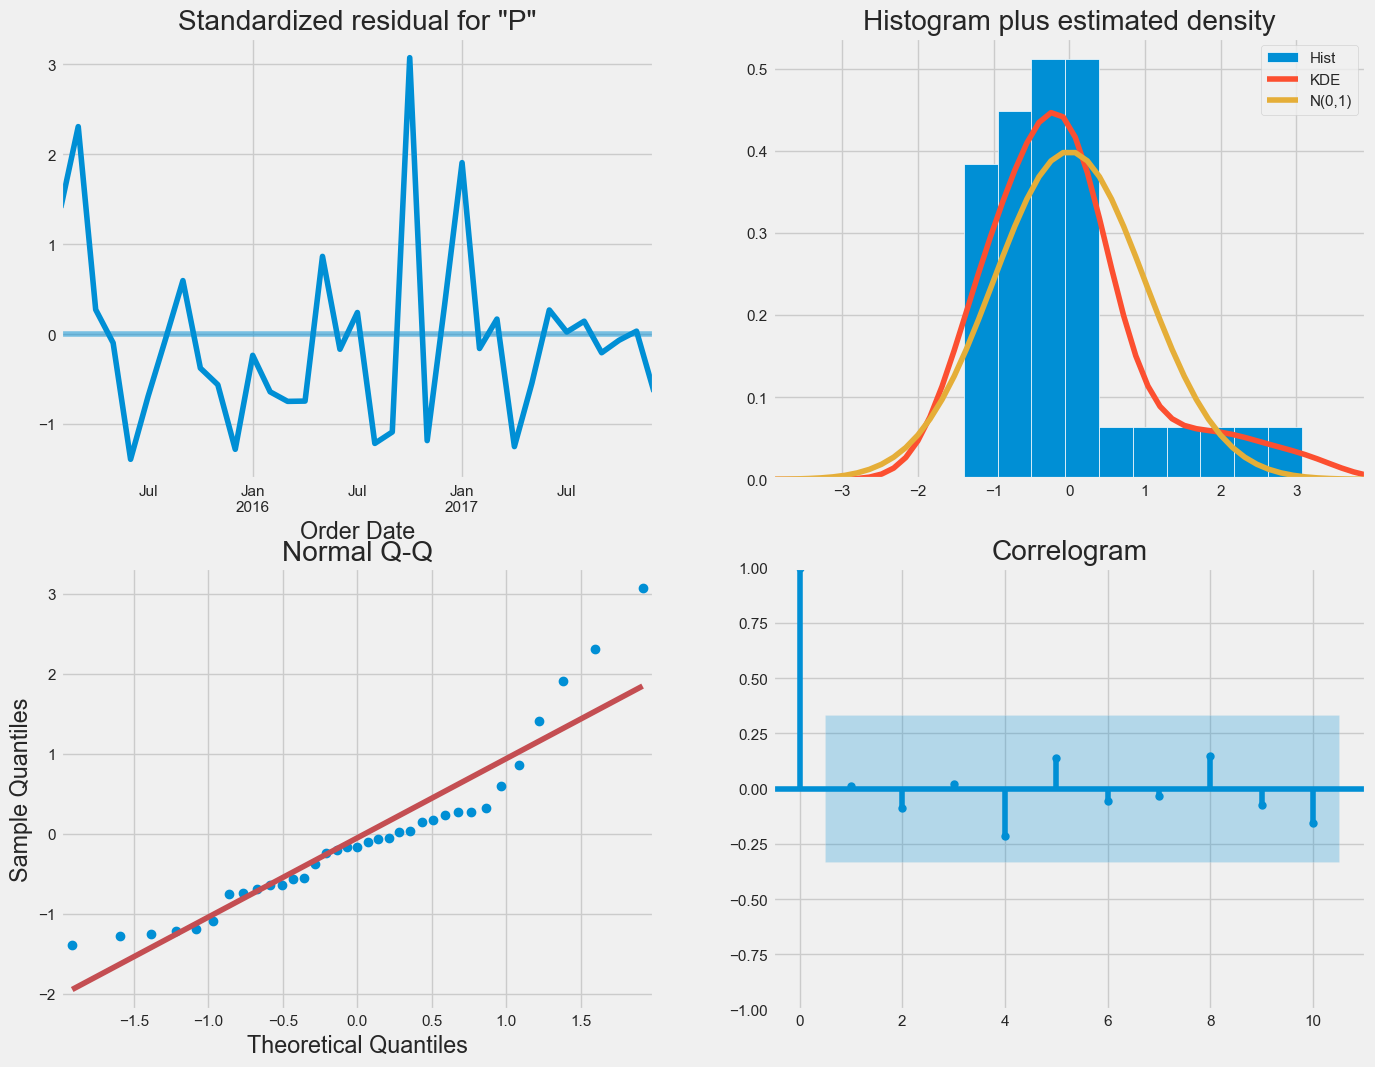

In [37]:
# Profit diagnostics
result_profit.plot_diagnostics(figsize=(15,12))
plt.show()

**We can conclude that model residuals are not normally distributed.**

# 6.3 Validating Forecasts

**We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts**

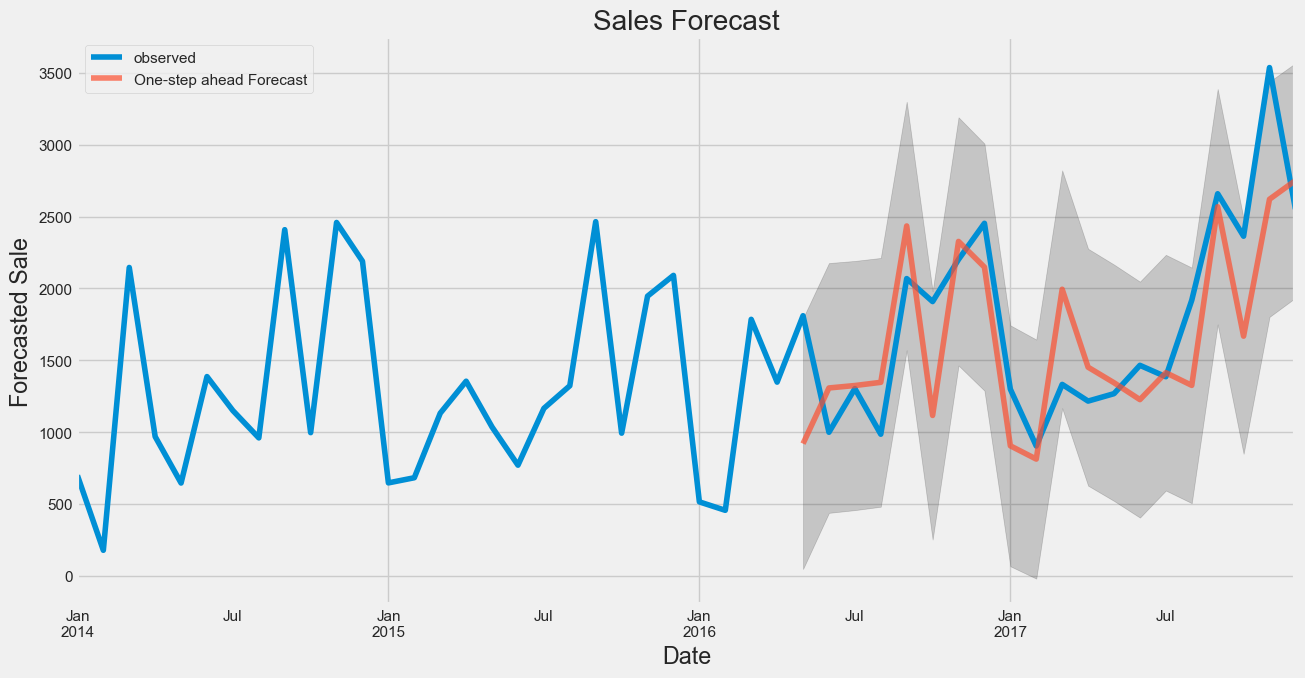

In [38]:
# We set our start from 2016-05-01 to the end of data to forecast

#Forecast for Sales data
pred_sales=result_sales.get_prediction(start=pd.to_datetime('2016-05-01'),dynamic=False)
pred_confi=pred_sales.conf_int()
ax=data_2['Sales']['2014':].plot(label='observed')
pred_sales.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7,figsize=(14,7))
ax.fill_between(pred_confi.index,
               pred_confi.iloc[:,0],
               pred_confi.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Sale')
plt.title("Sales Forecast")
plt.legend()
plt.show()

**From above plot we can conclude that the predicated values align well with the true values for sales data.**

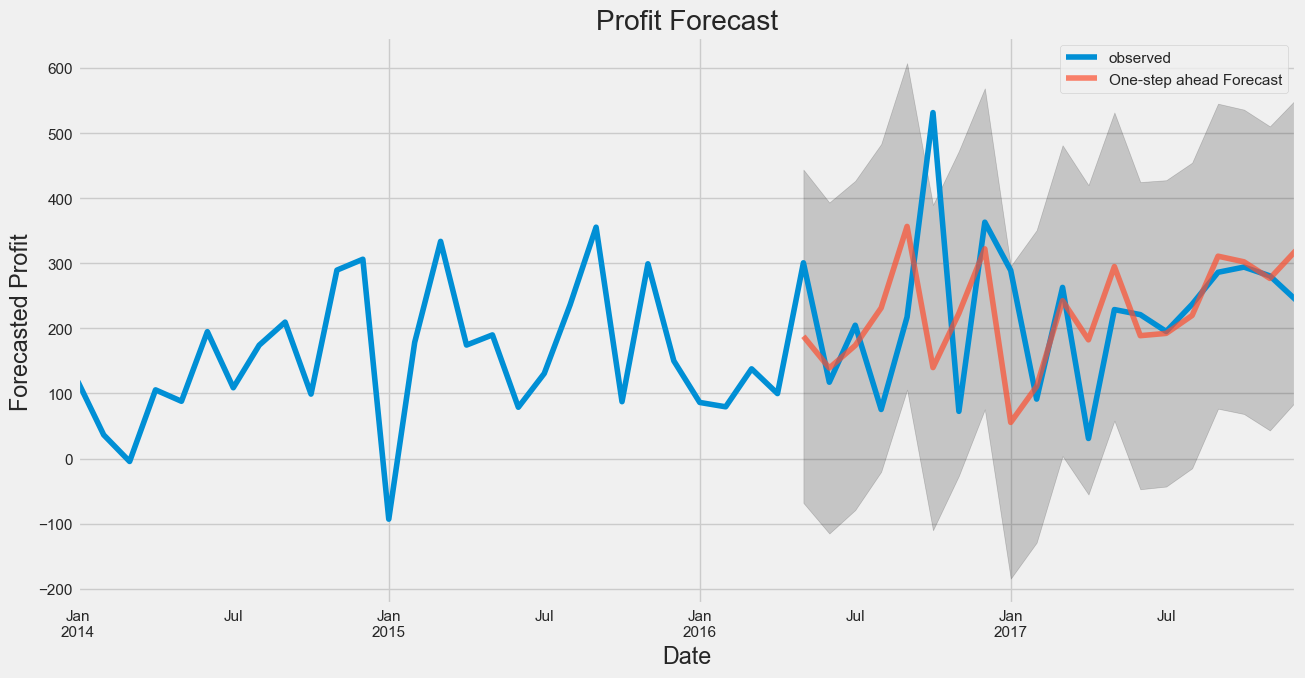

In [39]:
#Forecast for Profit data
pred_profit=result_profit.get_prediction(start=pd.to_datetime('2016-05-01'),dynamic=False)
pred_confi=pred_profit.conf_int()
ax=data_2['Profit']['2014':].plot(label='observed')
pred_profit.predicted_mean.plot(ax=ax,label='One-step ahead Forecast', alpha=.7,figsize=(14,7))
ax.fill_between(pred_confi.index,
               pred_confi.iloc[:,0],
               pred_confi.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Profit')
plt.title("Profit Forecast")
plt.legend()
plt.show()

**We can conclude that the predicted values are not well align with true values but, at few interval they match each other.**

# 6.4 Calculating MSE and RMSE

In [40]:
# MSE and RMSE for Sales Data

sales_forecasted=pred_sales.predicted_mean
sales_truth=data_2['Sales']['2014-01-03':]
mse=((sales_forecasted - sales_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 216613.34
The Root Mean Squared Error of our forecasts is 465.42


**MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily superstore sales in the test set within 465.42 of the real sales.**

In [41]:
# MSE and RMSE for Profit Data

profit_forecasted=pred_profit.predicted_mean
profit_truth=data_2['Profit']['2014-01-03':]
mse=((profit_forecasted - profit_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 16302.9
The Root Mean Squared Error of our forecasts is 127.68


**MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily superstore profit in the test set within 127.68 of the real profit.**

# 6.5 Visualizing The Forecast

            lower Sales  upper Sales
2018-01-01   634.752372  2243.558424
2018-02-01   392.538569  2025.272755
2018-03-01  1370.188230  3025.366855
2018-04-01  1014.229645  2691.427577
2018-05-01   967.598531  2666.516989
2018-06-01   924.556348  2644.919685
2018-07-01  1007.867440  2749.411496
2018-08-01  1060.577100  2823.047692
2018-09-01  2097.995273  3881.150100
2018-10-01  1321.395012  3125.026602
2018-11-01  2222.322161  4046.468927
2018-12-01  1956.860434  3802.719222
2019-01-01   664.077498  2617.932678


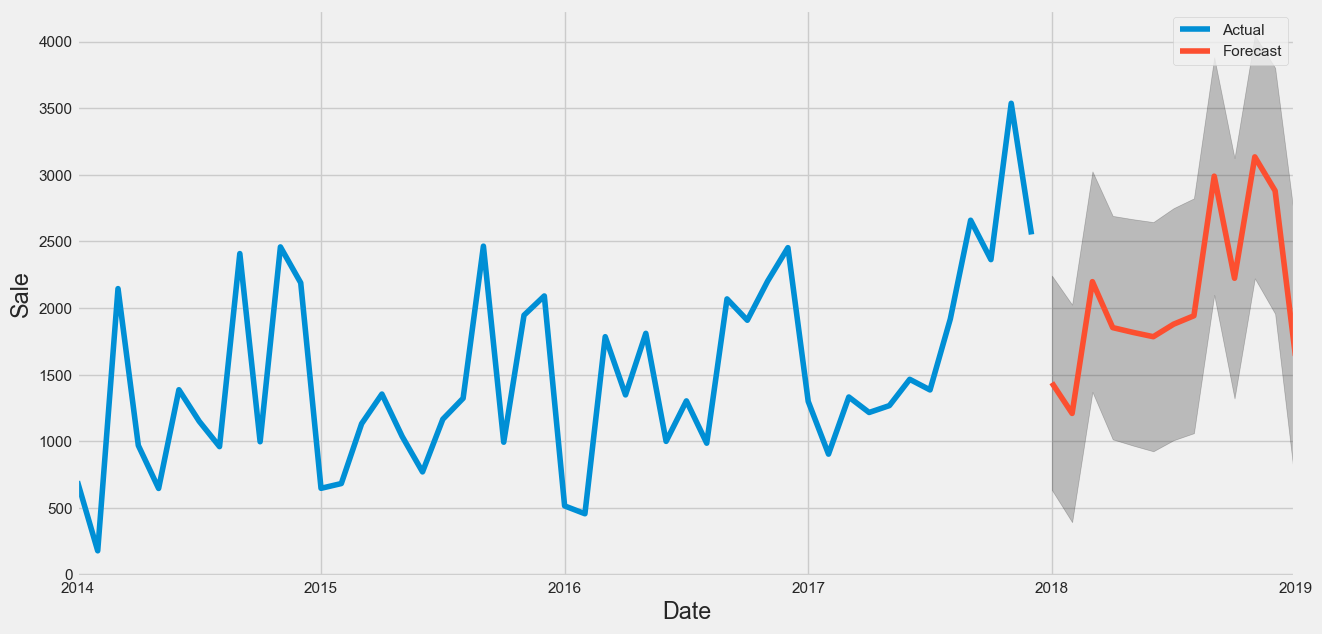

In [42]:
# Forecast For Sales Data

sales_pred=result_sales.get_forecast(steps=13)
sales_pred_confi=sales_pred.conf_int()
ax=data_2['Sales'].plot(label='Actual',figsize=(14,7))
sales_pred.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(sales_pred_confi.index,
               sales_pred_confi.iloc[:,0],
               sales_pred_confi.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sale')
print(sales_pred_confi)
plt.legend(loc='best')
plt.show()

**We can observe that as every start of year there is low sale and int the end of year the sale has high value. We can see all most same thing is observe in the predicted forecast.**

            lower Profit  upper Profit
2018-01-01    -42.583871    414.508012
2018-02-01    -79.056127    389.307064
2018-03-01     12.564681    484.090645
2018-04-01    -68.150618    403.007084
2018-05-01     30.419417    501.737208
2018-06-01    -17.711102    453.563139
2018-07-01    -11.237899    460.051076
2018-08-01      9.984636    481.264196
2018-09-01     95.932425    567.232759
2018-10-01     81.682354    552.905202
2018-11-01     65.788435    537.219251
2018-12-01     90.734650    560.481611
2019-01-01    -45.707815    435.962698


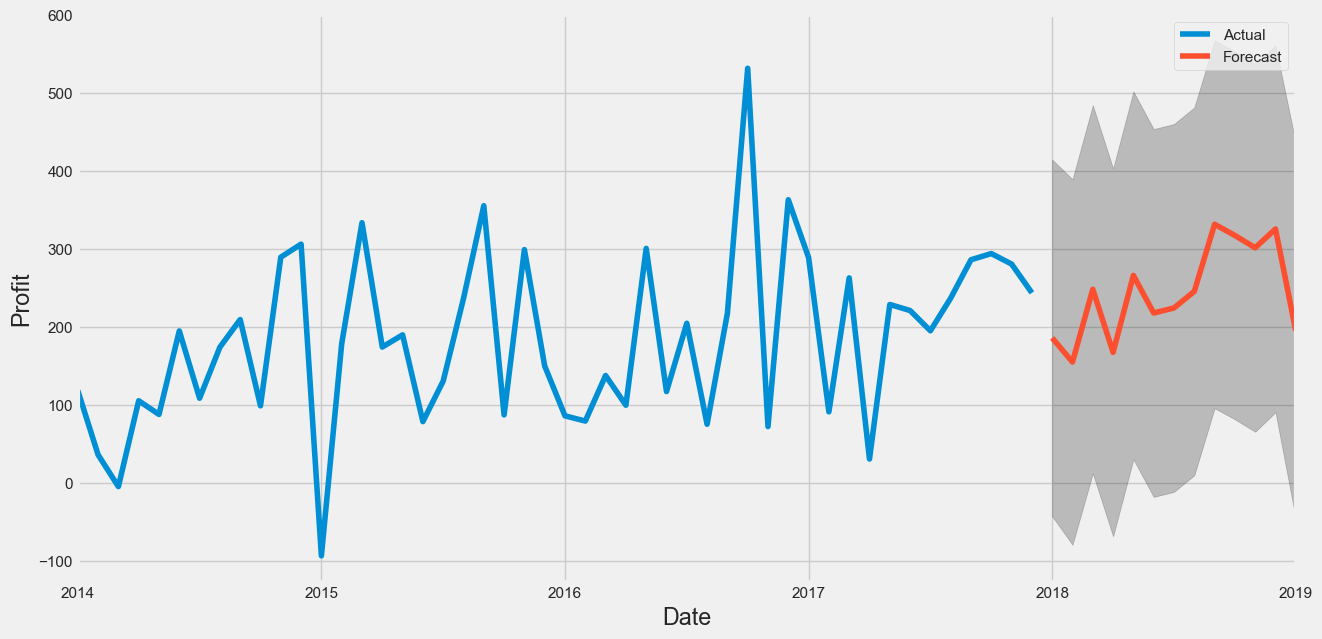

In [43]:
# Forecast For Profit Data

profit_pred=result_profit.get_forecast(steps=13)
profit_pred_confi=profit_pred.conf_int()
ax=data_2['Profit'].plot(label='Actual',figsize=(14,7))
profit_pred.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(profit_pred_confi.index,
               profit_pred_confi.iloc[:,0],
               profit_pred_confi.iloc[:,1], color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
print(profit_pred_confi)
plt.legend(loc='best')
plt.show()

**We can observe the forecast for profit for next 13 months.**

# 7. Conclusion

**Conculsion for Sales Data:**
We observe that sales of superstore produces seasonal pattern. Early of the year is the off season for superstore sales but, as the year goes the sales value increases. We also observe that sales increases linearly over time. Allmost same thing is observe in the forecast.

**Conclusion for Profit Data:**
We observe that profit of superstore for intial year was up and down as the year passes the profit start increasing. In the forecast we see similar pattern that start of year it is low and in the end of year it is high compare to start.


